In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [346]:
df2 = pd.read_csv('./data/test.csv')

In [347]:
df2.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [348]:
df1 = pd.read_csv('./data/train.csv')

In [349]:
df1.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [350]:
df1 = df1.drop('Survived',axis=1)
df1.shape,df2.shape

((891, 11), (418, 11))

In [351]:
df = df1.append(df2)
df.shape

(1309, 11)

In [352]:
df.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [353]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [354]:
df.Age.isna().sum(),df.Fare.isna().sum(),df.Embarked.isna().sum(),df.Cabin.isna().sum()

# Impute- Age, Fare and Embarked values, Drop Cabin as the Fare should cover this feature. 

(263, 1, 2, 1014)

#  name

In [355]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df['title']=df['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title  
0     Braund     Mr  
1    Cumings    Mrs  
2  Heikkinen   Miss

In [356]:
print(df['title'].unique())
# df['surname'].nunique()

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer' ' Dona']


In [357]:
df[df['title']==' Don']

PassengerId  Pclass                      Name   Sex   Age  SibSp  Parch  \
30           31       1  Uruchurtu, Don. Manuel E  male  40.0      0      0   

      Ticket     Fare Cabin Embarked    surname title  
30  PC 17601  27.7208   NaN        C  Uruchurtu   Don

In [358]:
df[df['title']==' Dona']

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   

     Parch    Ticket   Fare Cabin Embarked        surname  title  
414      0  PC 17758  108.9  C105        C  Oliva y Ocana   Dona

In [359]:
df['title'].isnull().any(),df['surname'].isnull().any()

(False, False)

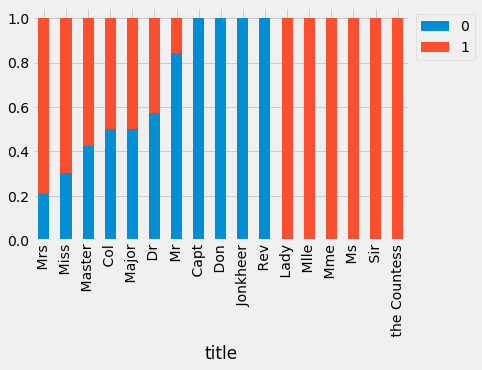

In [190]:
df1['title']=df1['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df11 = df1.groupby("title")['Survived'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True',legend=False)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# Fare 

In [360]:
df['Fare'].isnull().sum()

1

In [361]:
df['Fare'] = df['Fare'].ffill()
df['Fare'].isnull().any()

False

# Age

In [362]:
df['Age'].isnull().sum()

263

In [363]:
df.groupby('title')['title'].count()

title
 Capt              1
 Col               4
 Don               1
 Dona              1
 Dr                8
 Jonkheer          1
 Lady              1
 Major             2
 Master           61
 Miss            260
 Mlle              2
 Mme               1
 Mr              757
 Mrs             197
 Ms                2
 Rev               8
 Sir               1
 the Countess      1
Name: title, dtype: int64

In [364]:
df_t1 = df[df['Pclass']==1].groupby('title')['Age'].agg(['mean','median'])
df_t1.head(3)
df_t2= df[df['Pclass']==2].groupby('title')['Age'].agg(['mean','median'])
df_t2.head(3)
df_t3 = df[df['Pclass']==3].groupby('title')['Age'].agg(['mean','median'])
df_t3.head(3)

mean  median
title                     
 Master   6.090000     6.0
 Miss    17.360874    18.0
 Mr      28.318910    26.0

In [365]:
df_t1['mean_2'] = df_t2['mean']
df_t1['mean_3'] = df_t3['mean']
df_t1.head(3)

mean  median  mean_2  mean_3
title                              
 Capt  70.0    70.0     NaN     NaN
 Col   54.0    54.5     NaN     NaN
 Don   40.0    40.0     NaN     NaN

In [366]:
df_t1.head(19)
df_t1 = df_t1.drop('median',axis=1)
df_t1.columns = ['1','2','3']
df_t1

1          2          3
title                                         
 Capt          70.000000        NaN        NaN
 Col           54.000000        NaN        NaN
 Don           40.000000        NaN        NaN
 Dona          39.000000        NaN        NaN
 Dr            45.600000  38.500000        NaN
 Jonkheer      38.000000        NaN        NaN
 Lady          48.000000        NaN        NaN
 Major         48.500000        NaN        NaN
 Master         6.984000   2.757273   6.090000
 Miss          30.338983  20.717083  17.360874
 Mlle          24.000000        NaN        NaN
 Mme           24.000000        NaN        NaN
 Mr            41.450758  32.346715  28.318910
 Mrs           43.208955  33.518519  32.326531
 Sir           49.000000        NaN        NaN
 the Countess  33.000000        NaN        NaN

In [367]:
#  Mr,Mrs,Miss in Pclass == 1
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Mr'),41,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Miss'),30,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Mrs'),43,df['Age'])


#  Mr,Mrs,Miss in Pclass == 3
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Mr'),28,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Miss'),17,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Mrs'),32,df['Age'])

#  Mr,Mrs,Miss in Pclass == 2
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Mr'),32,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Miss'),21,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Mrs'),33,df['Age'])


#  Master in Pclass == 3,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Master'),6,df['Age'])
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Master'),7,df['Age'])

# Dr in Pclass == 1,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Dr'),45,df['Age'])


In [368]:
# Dr in Pclass == 1,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Ms'),17,df['Age'])



In [369]:
df['Age'].isnull().sum()

0

# Ticket 

In [375]:
df['Ticket_1'] = df['Ticket'].str.extract('([A-Z]*)',expand=True) 
df.head(3)
# based on the train data, only high correlated Ticket_1 prefixes are taken, rest are categorsied as 'Un'
# A,CA,W,SOTON,S,LINE,PC,PP,SO,SW,SCO - high importance

def ticket_check(x):
    if x=='' or x=='STON' or x=='C' or x=='P' or x=='WE' or x=='SC' or x=='F' or x=='LINE' or x=='PC' or x=='PP' or x=='AQ' or x=='LP':
        return 'Un'
    else:
        return x

df['Ticket_1'] = df['Ticket_1'].apply(ticket_check) 


In [376]:
df['Ticket_1'].unique()

array(['A', 'Un', 'S', 'CA', 'SO', 'W', 'SOTON', 'SW', 'SCO'],
      dtype=object)

In [377]:
df.groupby('Ticket_1')['Fare'].count()

Ticket_1
A          40
CA         22
S          21
SCO         1
SO          1
SOTON      27
SW          1
Un       1179
W          17
Name: Fare, dtype: int64

In [48]:
df1['Ticket_1'] = df1['Ticket'].str.extract('([A-Z]*)',expand=True) 
df1['Ticket_1'] = df1['Ticket_1'].apply(lambda x: 'Un' if x=='' else x )
df['Ticket_1'].unique()

array(['A', 'PC', 'STON', 'Un', 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'F', 'LINE', 'SW', 'SCO', 'P', 'WE', 'AQ', 'LP'],
      dtype=object)

In [49]:
df1.groupby('Ticket_1')['Fare'].count()

Ticket_1
A         29
C         33
CA        14
F          7
LINE       4
P          2
PC        60
PP         3
S         14
SC        13
SCO        1
SO         1
SOTON     17
STON      18
SW         1
Un       661
W         11
WE         2
Name: Fare, dtype: int64

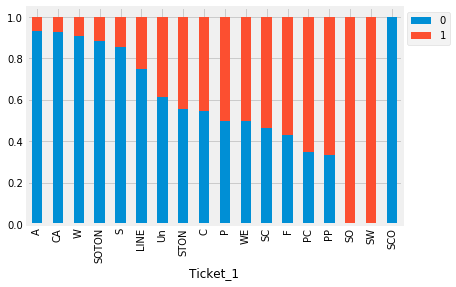

In [51]:
tk = df1.groupby("Ticket_1")['Survived'].value_counts(normalize=True).unstack()
tk.sort_values(by=df11.columns[1]).plot(kind='bar', stacked='True',legend=False)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#  Cabin

In [378]:
df['Cabin'].isnull().sum()

1014

In [379]:
df1['Fare'].nunique(),df1['Cabin'].nunique(),df['Fare'].nunique(),df['Cabin'].nunique()

(248, 147, 281, 186)

In [380]:
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title Ticket_1  
0     Braund     Mr        A  
1    Cumings    Mrs       Un  
2  Heikkinen   Miss       Un

In [208]:
c1 = df[df['Cabin'].isnull()==False][['Fare','Cabin']]
c1 = c1.sort_values(by='Fare')
c1['Fare'].nunique()

112

In [209]:
d1 = dict(zip(c1.Fare,c1.Cabin))
d2 = dict(sorted(d1.items()))
d2

{0.0: 'B102',
 5.0: 'B51 B53 B55',
 7.2292: 'F E46',
 7.65: 'F G73',
 7.75: 'F38',
 8.05: 'E10',
 10.4625: 'G6',
 10.5: 'E77',
 12.35: 'E101',
 12.475: 'E121',
 12.875: 'D',
 13.0: 'E101',
 13.7917: 'D',
 13.8625: 'D38',
 15.0458: 'D',
 16.7: 'G6',
 22.3583: 'F E69',
 25.5875: 'E58',
 25.7: 'C101',
 25.9292: 'D17',
 26.0: 'F2',
 26.2833: 'D47',
 26.2875: 'E24',
 26.3875: 'E25',
 26.55: 'D34',
 27.7208: 'B4',
 27.75: 'C111',
 28.5: 'C51',
 28.5375: 'C53',
 28.7125: 'C49',
 29.7: 'C118',
 30.0: 'C148',
 30.5: 'C30',
 30.6958: 'A7',
 31.0: 'A31',
 31.6792: 'A29',
 32.3208: 'D50',
 33.5: 'B19',
 34.0208: 'D46',
 34.6542: 'A5',
 35.0: 'C128',
 35.5: 'C52',
 38.5: 'E63',
 39.0: 'F4',
 39.4: 'D28',
 39.6: 'A16',
 40.125: 'A10',
 42.5: 'B11',
 49.5: 'B39',
 49.5042: 'C90',
 50.0: 'C39',
 50.4958: 'B10',
 51.4792: 'C101',
 51.8625: 'D21',
 52.0: 'B71',
 52.5542: 'D19',
 53.1: 'C123',
 55.0: 'E33',
 55.4417: 'E50',
 55.9: 'E44',
 56.9292: 'E36',
 57.0: 'B20',
 57.75: 'C28',
 57.9792: 'B18',
 60.

In [210]:
mask = df.Cabin.isnull()

In [211]:
df.loc[mask, 'Cabin'] = df.loc[mask, 'Fare'].map(d2)

In [212]:
df['Cabin'].isnull().sum()

674

In [213]:
import re
df['Cabin_1'] = df['Cabin'].str.extract('([A-Z]*)', expand=True)
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title Ticket_1 Cabin_1  
0     Braund     Mr        A     NaN  
1    Cumings    Mrs       PC       C  
2  Heikkinen   Miss       Un     NaN

In [214]:
df['Cabin_1'].unique()

array([nan, 'C', 'E', 'G', 'F', 'D', 'A', 'B', 'T'], dtype=object)

In [216]:
df = df.sort_values(by='Fare')
df.head(3)

PassengerId  Pclass                              Name   Sex   Age  SibSp  \
466          467       2             Campbell, Mr. William  male  32.0      0   
481          482       2  Frost, Mr. Anthony Wood "Archie"  male  32.0      0   
597          598       3               Johnson, Mr. Alfred  male  49.0      0   

     Parch  Ticket  Fare Cabin Embarked   surname title Ticket_1 Cabin_1  
466      0  239853   0.0  B102        S  Campbell    Mr       Un       B  
481      0  239854   0.0  B102        S     Frost    Mr       Un       B  
597      0    LINE   0.0  B102        S   Johnson    Mr     LINE       B

In [217]:
df['Cabin_1'] = df['Cabin_1'].fillna(method='ffill')
df['Cabin_1'].isnull().sum()

0

In [218]:
df = df.sort_values(by='PassengerId')
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title Ticket_1 Cabin_1  
0     Braund     Mr        A       F  
1    Cumings    Mrs       PC       C  
2  Heikkinen   Miss       Un       F

In [ ]:

# df.loc[df.Cabin.isnull(),'Cabin'] = df.loc[df.Cabin.isnull(),'Fare'].map(fare1[,'Cabin'])
# fare1 = fare1.set_index('Fare')
# fare1['Fare'].nunique()
# df.loc[mask, 'Cabin'] = df.loc[mask, 'Fare'].map(d2)

# idx = pd.date_range(rates['Date'].min(), rates['Date'].max())
# rates = rates.set_index('Date').reindex(idx).ffill()
# sales.loc[sales['Currency'] != 'EUR','Rate'] = sales.loc[sales['Currency'] != 'EUR','Date'].map(rates['Rate'])


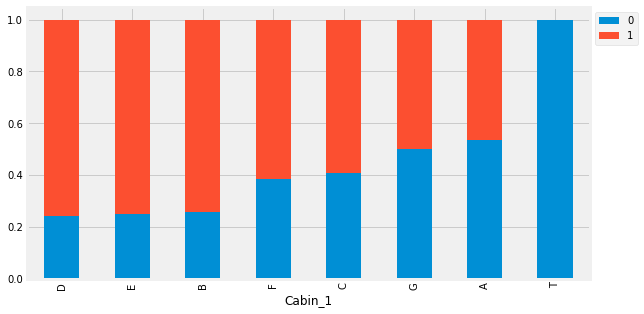

In [42]:
C1 = df1.groupby('Cabin_1')['Survived'].value_counts(normalize=True).unstack()
C1.sort_values(by=C1.columns[0]).plot(kind='bar', stacked='True',legend=False,figsize=(9,5))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

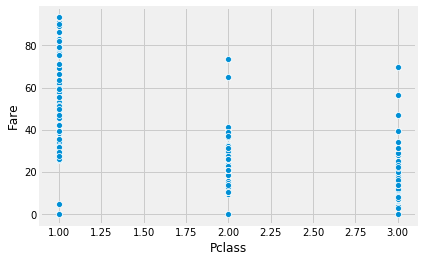

In [112]:
sns.scatterplot(y='Fare',x='Pclass',data=df[df['Fare']<100])

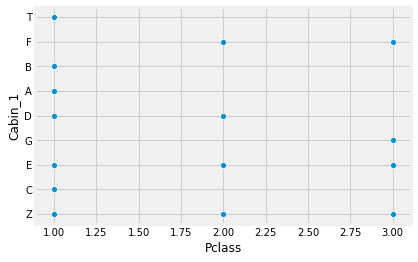

In [114]:
sns.scatterplot(y='Cabin_1',x='Pclass',data=df)

#  Embarked

In [219]:
print(df[df['Embarked'].isnull()])

     PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked surname  title Ticket_1  \
61   38.0      0      0  113572  80.0   B28      NaN   Icard   Miss       Un   
829  62.0      0      0  113572  80.0   B28      NaN   Stone    Mrs       Un   

    Cabin_1  
61        B  
829       B  


In [220]:
# Since both passengers missing values for Embarked has survived, assign C as high survival rate. 

In [221]:
df['Embarked'] = df['Embarked'].fillna('C')

In [222]:
df['Embarked'].isna().sum()

0

In [223]:
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title Ticket_1 Cabin_1  
0     Braund     Mr        A       F  
1    Cumings    Mrs       PC       C  
2  Heikkinen   Miss       Un       F

# drop columns and scale/encode

In [226]:
#  drop - ['PassengerId', 'Name', Ticket, 'Fare', 'Cabin','surname', 'title','Ticket_2']
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'surname', 'title', 'Ticket_1',
       'Cabin_1'],
      dtype='object')

In [227]:
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

     surname  title Ticket_1 Cabin_1  
0     Braund     Mr        A       F  
1    Cumings    Mrs       PC       C  
2  Heikkinen   Miss       Un       F

In [228]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','surname'],axis=1)
df.head(3)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  title Ticket_1  \
0       3    male  22.0      1      0   7.2500        S     Mr        A   
1       1  female  38.0      1      0  71.2833        C    Mrs       PC   
2       3  female  26.0      0      0   7.9250        S   Miss       Un   

  Cabin_1  
0       F  
1       C  
2       F

In [231]:
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')],axis=1)
df = pd.concat([df,pd.get_dummies(df['title'], prefix='title')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Ticket_1'], prefix='ticket')],axis=1)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = pd.concat([df,pd.get_dummies(df['Cabin_1'], prefix='Cabin')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Pclass'], prefix='Pclass')],axis=1)

In [230]:
df = df.drop(['Pclass','Embarked','title','Ticket_1','Cabin_1'],axis=1)
df.head(3)

Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S  \
0    0  22.0      1      0   7.2500           0           0           1   
1    1  38.0      1      0  71.2833           1           0           0   
2    1  26.0      0      0   7.9250           0           0           1   

   title_ Capt  title_ Col  ...  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
0            0           0  ...        0        0        0        0        1   
1            0           0  ...        0        1        0        0        0   
2            0           0  ...        0        0        0        0        1   

   Cabin_G  Cabin_T  Pclass_1  Pclass_2  Pclass_3  
0        0        0         0         0         1  
1        0        0         1         0         0  
2        0        0         0         0         1  

[3 rows x 51 columns]

In [232]:
df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'title_ Capt', 'title_ Col', 'title_ Don', 'title_ Dona',
       'title_ Dr', 'title_ Jonkheer', 'title_ Lady', 'title_ Major',
       'title_ Master', 'title_ Miss', 'title_ Mlle', 'title_ Mme',
       'title_ Mr', 'title_ Mrs', 'title_ Ms', 'title_ Rev', 'title_ Sir',
       'title_ the Countess', 'ticket_A', 'ticket_AQ', 'ticket_CA',
       'ticket_LINE', 'ticket_LP', 'ticket_PC', 'ticket_PP', 'ticket_S',
       'ticket_SCO', 'ticket_SO', 'ticket_SOTON', 'ticket_SW', 'ticket_Un',
       'ticket_W', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [235]:
df.isnull().any()

Sex                    False
Age                    False
SibSp                  False
Parch                  False
Fare                   False
Embarked_C             False
Embarked_Q             False
Embarked_S             False
title_ Capt            False
title_ Col             False
title_ Don             False
title_ Dona            False
title_ Dr              False
title_ Jonkheer        False
title_ Lady            False
title_ Major           False
title_ Master          False
title_ Miss            False
title_ Mlle            False
title_ Mme             False
title_ Mr              False
title_ Mrs             False
title_ Ms              False
title_ Rev             False
title_ Sir             False
title_ the Countess    False
ticket_A               False
ticket_AQ              False
ticket_CA              False
ticket_LINE            False
ticket_LP              False
ticket_PC              False
ticket_PP              False
ticket_S               False
ticket_SCO    

# GDBoost 

In [1037]:
df1.shape,df.shape

((891, 13), (1309, 38))

In [1038]:
# Separate out the target

x_train = df[:891]
y_train = df1['Survived']
x_test = df[891:]

x_train.shape,y_train.shape,x_test.shape

((891, 38), (891,), (418, 38))

In [1039]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.3)

In [1040]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=25, learning_rate=0.04,
                                     max_depth=200, random_state=42, max_leaf_nodes=10)
gb_clf2.fit(x_train1, y_train1)
predictions = gb_clf2.predict(x_test1)

In [1041]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, predictions))

print("Classification Report")
print(classification_report(y_test1, predictions))

Confusion Matrix:
[[163  17]
 [ 26  62]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       180
           1       0.78      0.70      0.74        88

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.84      0.84      0.84       268



In [762]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=25, learning_rate=0.04,
                                     max_depth=100, random_state=42, max_leaf_nodes=50)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

In [763]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [939]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [337]:
df2['Survived'] = predictions
df2.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  Survived  
0      0  330911  7.8292   NaN        Q         0  
1      0  363272  7.0000   NaN        S         0  
2      0  240276  9.6875   NaN        Q         0

In [338]:
pred = df2.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
pred.head(5)

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [339]:
pred = pred.set_index('PassengerId')

In [340]:
pred.head(3)

Survived
PassengerId          
892                 0
893                 0
894                 0

In [341]:
write1 = pred.to_csv('./data/fea1.csv')

In [342]:
test1 = pd.read_csv('./data/fea1.csv',index_col=0)

# lgb2 = all except ticket features as the share in test set is not the same. 
# lgb1 = all features (ticket_1,_2,cabin_1,etc)
# pred6 = same as above

In [343]:
test1.head(3)

Survived
PassengerId          
892                 0
893                 0
894                 0

In [344]:
test1.shape

(418, 1)

#  Feature importance

In [1042]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [1043]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(x_train,y_train)

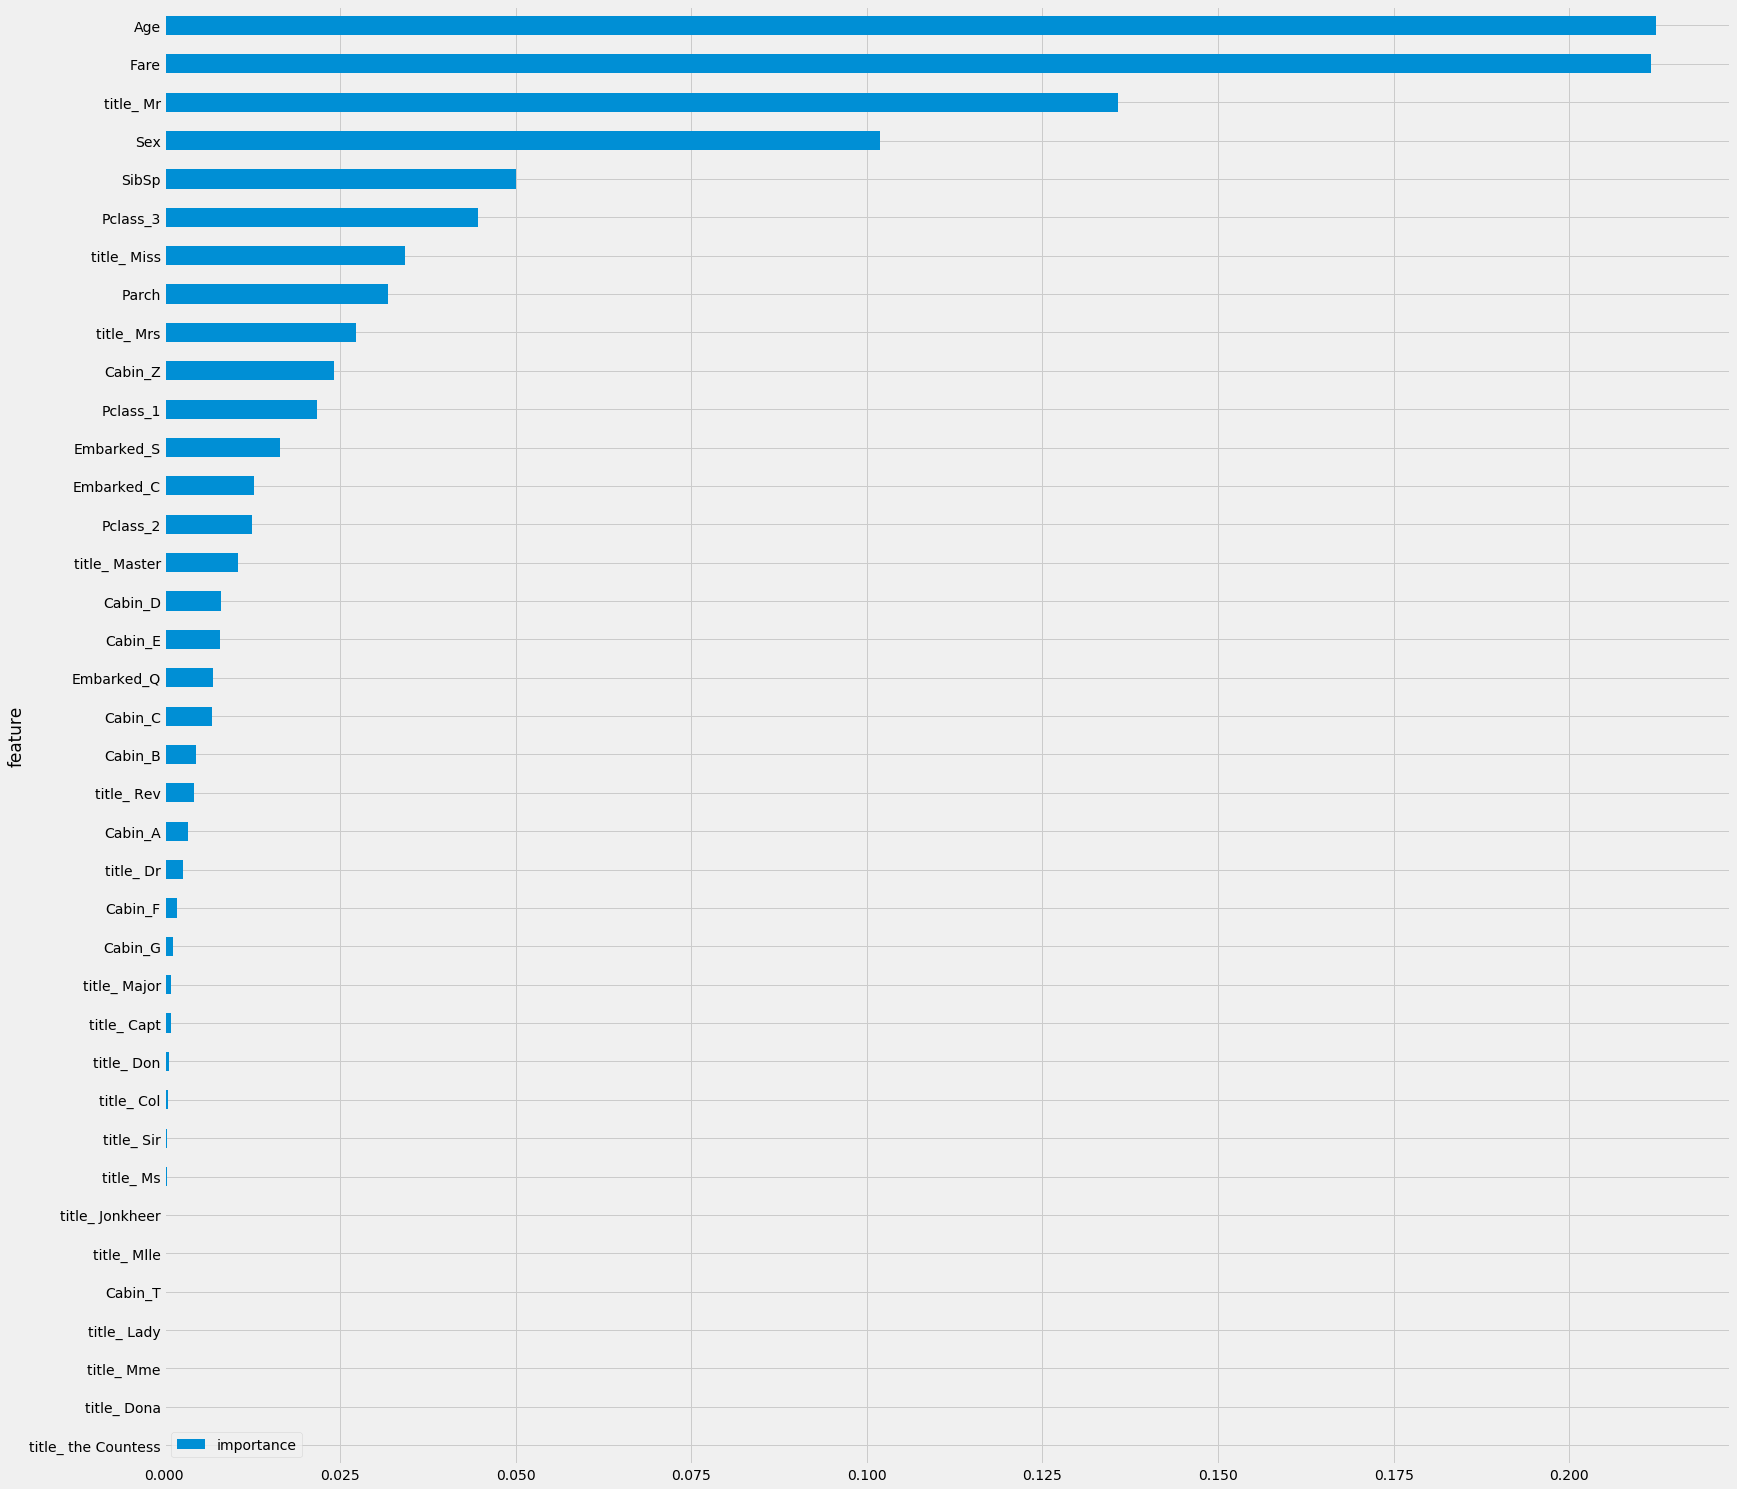

In [1044]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

# lgbm 

In [237]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [238]:
x_train = df[:891]
y_train = df1['Survived']
x_test = df[891:]

x_train.shape,y_train.shape,x_test.shape

((891, 51), (891,), (418, 51))

In [327]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.25)

In [328]:
# model = LGBMClassifier(
# #         boosting = 'dart',
#         objective='binary',
#         lass_weight = 'balanced',
#         metrics ='auc',
#         n_jobs=-1,
#         n_estimators=50,
#         learning_rate=0.22,
#         num_leaves=65,
#         max_depth =12,
#         num_iterations = 250,
#         verbose=-1,
#         random_state=42)

In [329]:
model = LGBMClassifier(
#         boosting = 'dart',
        objective='binary', lass_weight = 'balanced', metrics ='auc', n_jobs=-1, n_estimators=35,
        learning_rate=0.22, num_leaves=100,max_depth =25, num_iterations = 250, verbose=-1, random_state=42)

In [330]:
model.fit(x_train1, y_train1,
        eval_set=[(x_test1, y_test1)],
        eval_metric=['Accuracy'], 
        early_stopping_rounds=100)

[1]	valid_0's auc: 0.858586
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.873106
[3]	valid_0's auc: 0.879756
[4]	valid_0's auc: 0.882492
[5]	valid_0's auc: 0.891751
[6]	valid_0's auc: 0.895918
[7]	valid_0's auc: 0.892382
[8]	valid_0's auc: 0.892803
[9]	valid_0's auc: 0.892971
[10]	valid_0's auc: 0.891414
[11]	valid_0's auc: 0.888258
[12]	valid_0's auc: 0.89436
[13]	valid_0's auc: 0.897264
[14]	valid_0's auc: 0.895328
[15]	valid_0's auc: 0.899032
[16]	valid_0's auc: 0.899369
[17]	valid_0's auc: 0.898695
[18]	valid_0's auc: 0.899537
[19]	valid_0's auc: 0.895076
[20]	valid_0's auc: 0.894655
[21]	valid_0's auc: 0.896423
[22]	valid_0's auc: 0.898106
[23]	valid_0's auc: 0.901221
[24]	valid_0's auc: 0.902778
[25]	valid_0's auc: 0.901094
[26]	valid_0's auc: 0.902609
[27]	valid_0's auc: 0.902694
[28]	valid_0's auc: 0.900589
[29]	valid_0's auc: 0.902104
[30]	valid_0's auc: 0.901768
[31]	valid_0's auc: 0.900253
[32]	valid_0's auc: 0.900926
[33]	valid_0's auc: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lass_weight='balanced',
               learning_rate=0.22, max_depth=25, metrics='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=35, n_jobs=-1, num_iterations=250, num_leaves=100,
               objective='binary', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [332]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lass_weight='balanced',
               learning_rate=0.22, max_depth=25, metrics='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=35, n_jobs=-1, num_iterations=250, num_leaves=100,
               objective='binary', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

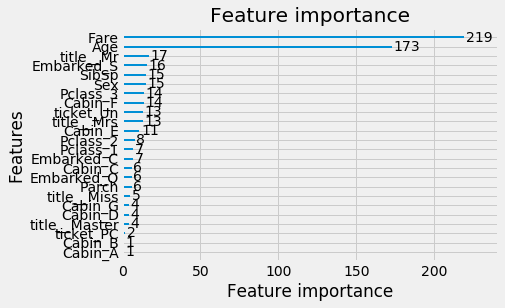

In [331]:
lgb.plot_importance(model)

In [335]:
# predict
predictions = model.predict(x_test, num_iteration=model.best_iteration_)

In [336]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,